In [ ]:
#ANOVA

ANOVA
ANOVA is a statistical test that stands for analysis of variance.

ANOVA was developed by statistician and evolutionary biologist Ronald Fisher. The idea behind ANOVA is to compare different groups of samples to determine whether there is a significant difference between the groups.

ANOVA is an extension of the t and the z test and was developed to compare more than two groups.

The null hypothesis of ANOVA is that there is no difference between the groups. The alternative hypothesis is that there is a difference between the groups.

ANOVA is an omnibus test, meaning it tests the data as a whole. In other words, it does not tell you which specific groups were significantly different from each other; it only tells you that at least two groups were different.

Types of ANOVA
There are three main types of ANOVA:

One-way ANOVA -- effect of 1 categorical variable let fertilizer on 
1 continuous variable let growth

Two-way ANOVA-- 1 countinous variable based on 2 categorical variables

N-way ANOVA -- one cont. variable and 3 or more categorical variables

Assumptions of ANOVA
ANOVA has three main assumptions:

The samples are independent.
The samples are normally distributed.
The variance of each group is equal.
If these assumptions are not met, you may not be able to trust the results of your ANOVA.

#1. ONE-WAY ANOVA

In [1]:
import scipy.stats as stats

# Sample data: Growth of plants with three types of fertilizers
fertilizer1 = [20, 22, 19, 24, 25]
fertilizer2 = [28, 30, 27, 26, 29]
fertilizer3 = [18, 20, 22, 19, 24]

# Perform the one-way ANOVA
f_stat, p_val = stats.f_oneway(fertilizer1, fertilizer2, fertilizer3)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# print the results based on if the p-value is less than 0.05

if p_val < 0.05:
    print("Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05")
else:
    print("Accept null hypothesis: The means are equal, as the p-value: {p_val} is greater than 0.05")

F-statistic: 15.662162162162158
p-value: 0.0004515404760997283
Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05


#Using Statsmodels

In [2]:
!pip install statsmodels --quiet

In [3]:
# One-way ANOVA using statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
# Create a dataframe
df = pd.DataFrame({"fertilizer": ["fertilizer1"] * 5 + ["fertilizer2"] * 5 + ["fertilizer3"] * 5,
                   "growth": fertilizer1 + fertilizer2 + fertilizer3})
df.head()

,fertilizer,growth
0,fertilizer1,20
1,fertilizer1,22
2,fertilizer1,19
3,fertilizer1,24
4,fertilizer1,25


In [5]:
df['fertilizer'].value_counts()

fertilizer
fertilizer1    5
fertilizer2    5
fertilizer3    5
Name: count, dtype: int64

In [6]:
# Fit the model
model = ols("growth ~ fertilizer", data=df).fit()

In [7]:
# Perform ANOVA and print the summary table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq    df          F    PR(>F)
fertilizer  154.533333   2.0  15.662162  0.000452
Residual     59.200000  12.0        NaN       NaN


In [8]:
# print the results based on if the p-value is less than 0.05
if anova_table["PR(>F)"][0] < 0.05:
    print("Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05")
else:
    print("Accept null hypothesis: The means are equal, as the p-value: {p_val} is greater than 0.05")

Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3164\1383170519.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table["PR(>F)"][0] < 0.05:


# One-way ANOVA using statsmodels

In [9]:
# One-way ANOVA using statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a dataframe
df = pd.DataFrame({"fertilizer": ["fertilizer1"] * 5 + ["fertilizer2"] * 5 + ["fertilizer3"] * 5,
                   "growth": fertilizer1 + fertilizer2 + fertilizer3})

# Fit the model
model = ols("growth ~ fertilizer", data=df).fit()

# Perform ANOVA and print the summary table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# print the results based on if the p-value is less than 0.05
if anova_table["PR(>F)"][0] < 0.05:
    print("Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05")
else:
    print("Accept null hypothesis: The means are equal, as the p-value: {p_val} is greater than 0.05")

                sum_sq    df          F    PR(>F)
fertilizer  154.533333   2.0  15.662162  0.000452
Residual     59.200000  12.0        NaN       NaN
Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3164\4075434861.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table["PR(>F)"][0] < 0.05:


#2. TWO-WAY ANOVA

In [10]:
# Sample data
data = pd.DataFrame({
    "Growth": [20, 22, 19, 24, 25, 28, 30, 27, 26, 29, 18, 20, 22, 19, 24,
               21, 23, 20, 25, 26, 29, 31, 28, 27, 30, 19, 21, 23, 20, 25],
    "Fertilizer": ["F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2", 
                   "F3", "F3", "F3", "F3", "F3", "F1", "F1", "F1", "F1", "F1", 
                   "F2", "F2", "F2", "F2", "F2", "F3", "F3", "F3", "F3", "F3"],
    "Sunlight": ["High", "High", "High", "High", "High", "High", "High", "High", "High", "High", 
                 "High", "High", "High", "High", "High", "Low", "Low", "Low", "Low", "Low", 
                 "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low"]
})
data.head()

,Growth,Fertilizer,Sunlight
0,20,F1,High
1,22,F1,High
2,19,F1,High
3,24,F1,High
4,25,F1,High


In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data
data = pd.DataFrame({
    "Growth": [20, 22, 19, 24, 25, 28, 30, 27, 26, 29, 18, 20, 22, 19, 24,
               21, 23, 20, 25, 26, 29, 31, 28, 27, 30, 19, 21, 23, 20, 25],
    "Fertilizer": ["F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2", 
                   "F3", "F3", "F3", "F3", "F3", "F1", "F1", "F1", "F1", "F1", 
                   "F2", "F2", "F2", "F2", "F2", "F3", "F3", "F3", "F3", "F3"],
    "Sunlight": ["High", "High", "High", "High", "High", "High", "High", "High", "High", "High", 
                 "High", "High", "High", "High", "High", "Low", "Low", "Low", "Low", "Low", 
                 "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low"]
})

# Perform two-way ANOVA
model = ols('Growth ~ C(Fertilizer) + C(Sunlight) + C(Fertilizer):C(Sunlight)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# print the results based on if the p-value is less than 0.05

if anova_table["PR(>F)"][0] < 0.05:
    print("Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05")
else:
    print("Accept null hypothesis: The means are equal, as the p-value: {p_val} is greater than 0.05")

                                 sum_sq    df             F        PR(>F)
C(Fertilizer)              3.090667e+02   2.0  3.132432e+01  2.038888e-07
C(Sunlight)                7.500000e+00   1.0  1.520270e+00  2.295198e-01
C(Fertilizer):C(Sunlight)  6.442364e-29   2.0  6.529423e-30  1.000000e+00
Residual                   1.184000e+02  24.0           NaN           NaN
Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3164\1127512014.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table["PR(>F)"][0] < 0.05:


Interpretation
For One-Way ANOVA, if the p-value is less than 0.05, it suggests a significant difference in means among the groups.
For Two-Way ANOVA, we look at the p-values for each factor and their interaction. A p-value less than 0.05 indicates a significant effect.

#N-way ANOVA

N-way ANOVA, also known as factorial ANOVA, is used when you have more than two independent variables. It allows you to analyze the effects of each factor on the dependent variable and the interaction effects between factors.

Example: Three-Way ANOVA
Suppose we have an experimental data set with three factors:

Fertilizer Type (3 levels: F1, F2, F3)
Sunlight Exposure (2 levels: High, Low)
Watering Frequency (2 levels: Regular, Sparse)
We want to study the impact of these factors and their interactions on plant growth.

In [12]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data
data = pd.DataFrame({
    "Growth": [20, 22, 19, 24, 25, 28, 30, 27, 26, 29, 18, 20, 22, 19, 24,
               21, 23, 20, 25, 26, 29, 31, 28, 27, 30, 19, 21, 23, 20, 25,
               20, 22, 21, 23, 24, 26, 28, 25, 27, 29, 17, 19, 21, 18, 20],
    "Fertilizer": ["F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2", 
                   "F3", "F3", "F3", "F3", "F3", "F1", "F1", "F1", "F1", "F1", 
                   "F2", "F2", "F2", "F2", "F2", "F3", "F3", "F3", "F3", "F3",
                   "F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2", 
                   "F3", "F3", "F3", "F3", "F3"],
    "Sunlight": ["High", "High", "High", "High", "High", "High", "High", "High", "High", "High", 
                 "High", "High", "High", "High", "High", "Low", "Low", "Low", "Low", "Low", 
                 "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low",
                 "High", "High", "High", "High", "High", "High", "High", "High", "High", "High", 
                 "High", "High", "High", "High", "High"],
    "Watering": ["Regular", "Regular", "Regular", "Regular", "Regular", 
                 "Regular", "Regular", "Regular", "Regular", "Regular",
                 "Regular", "Regular", "Regular", "Regular", "Regular",
                 "Sparse", "Sparse", "Sparse", "Sparse", "Sparse", 
                 "Sparse", "Sparse", "Sparse", "Sparse", "Sparse",
                 "Sparse", "Sparse", "Sparse", "Sparse", "Sparse",
                 "Regular", "Regular", "Regular", "Regular", "Regular", 
                 "Regular", "Regular", "Regular", "Regular", "Regular",
                 "Regular", "Regular", "Regular", "Regular", "Regular"]
})

# Fit the model
model = ols('Growth ~ C(Fertilizer) + C(Sunlight) + C(Watering) + C(Fertilizer):C(Sunlight) + C(Fertilizer):C(Watering) + C(Sunlight):C(Watering) + C(Fertilizer):C(Sunlight):C(Watering)', data=data).fit()

# Perform three-way ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)


# print the results based on if the p-value is less than 0.05

if anova_results["PR(>F)"][0] < 0.05:
    print("Reject null hypothesis: The means are not equal, as the p-value: {p_val} is less than 0.05")
else:
    print("Fail to reject null hypothesis: The means are equal, as the p-value: {p_val} is greater than 0.05")

                                             sum_sq    df             F  \
C(Fertilizer)                          2.333867e+02   2.0  2.893223e+01   
C(Sunlight)                           -2.159294e-12   1.0 -5.353622e-13   
C(Watering)                            1.024314e+01   1.0  2.539620e+00   
C(Fertilizer):C(Sunlight)             -4.861072e-13   2.0 -6.026122e-14   
C(Fertilizer):C(Watering)              9.531901e-01   2.0  1.181641e-01   
C(Sunlight):C(Watering)                2.054444e+01   1.0  5.093664e+00   
C(Fertilizer):C(Sunlight):C(Watering)  1.088889e+00   2.0  1.349862e-01   
Residual                               1.573000e+02  39.0           NaN   

                                             PR(>F)  
C(Fertilizer)                          1.974932e-08  
C(Sunlight)                            1.000000e+00  
C(Watering)                            1.190950e-01  
C(Fertilizer):C(Sunlight)              1.000000e+00  
C(Fertilizer):C(Watering)              8.888672e-01  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3164\3243821222.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_results["PR(>F)"][0] < 0.05:


Interpretation
In the output, you'll see p-values for:

The main effects of each factor (Fertilizer, Sunlight, Watering)
The interaction effects between two factors (e.g., Fertilizer:Sunlight)
The interaction effect among all three factors (Fertilizer:Sunlight:Watering)
A p-value less than 0.05 typically suggests a statistically significant effect. However, interpreting ANOVA results can be complex, especially with interactions. You should consider the practical significance and the context of your experiment alongside the statistical results.

Remember, ANOVA makes certain assumptions (normality, homogeneity of variance, and independence), which should be tested before running the analysis.


#Post-hoc Tests

After conducting an ANOVA and finding a significant difference, a post hoc test is needed to determine exactly which groups differ from each other. Here, I'll demonstrate post hoc tests for one-way, two-way, and N-way ANOVA using Python.

#Post-hoc Tests for One-Way ANOVA

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Sample data
data = {
    'Growth': np.concatenate([fertilizer1, fertilizer2, fertilizer3]),
    'Fertilizer': ['F1']*len(fertilizer1) + ['F2']*len(fertilizer2) + ['F3']*len(fertilizer3)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['Growth'], groups=df['Fertilizer'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    F1     F2      6.0 0.0029   2.2523  9.7477   True
    F1     F3     -1.4 0.5928  -5.1477  2.3477  False
    F2     F3     -7.4 0.0005 -11.1477 -3.6523   True
-----------------------------------------------------


#Post-hoc Tests for Two-Way ANOVA

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data
data = pd.DataFrame({
    "Growth": [20, 22, 19, 24, 25, 28, 30, 27, 26, 29, 18, 20, 22, 19, 24,
               21, 23, 20, 25, 26, 29, 31, 28, 27, 30, 19, 21, 23, 20, 25],
    "Fertilizer": ["F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2", 
                   "F3", "F3", "F3", "F3", "F3", "F1", "F1", "F1", "F1", "F1", 
                   "F2", "F2", "F2", "F2", "F2", "F3", "F3", "F3", "F3", "F3"],
    "Sunlight": ["High", "High", "High", "High", "High", "High", "High", "High", "High", "High", 
                 "High", "High", "High", "High", "High", "Low", "Low", "Low", "Low", "Low", 
                 "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low"]
})

tukey = pairwise_tukeyhsd(data['Growth'], data['Fertilizer'] + data['Sunlight'], alpha=0.05)

In [15]:
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
F1High  F1Low      1.0 0.9786  -3.3434  5.3434  False
F1High F2High      6.0 0.0032   1.6566 10.3434   True
F1High  F2Low      7.0 0.0006   2.6566 11.3434   True
F1High F3High     -1.4 0.9145  -5.7434  2.9434  False
F1High  F3Low     -0.4 0.9997  -4.7434  3.9434  False
 F1Low F2High      5.0 0.0176   0.6566  9.3434   True
 F1Low  F2Low      6.0 0.0032   1.6566 10.3434   True
 F1Low F3High     -2.4 0.5396  -6.7434  1.9434  False
 F1Low  F3Low     -1.4 0.9145  -5.7434  2.9434  False
F2High  F2Low      1.0 0.9786  -3.3434  5.3434  False
F2High F3High     -7.4 0.0003 -11.7434 -3.0566   True
F2High  F3Low     -6.4 0.0016 -10.7434 -2.0566   True
 F2Low F3High     -8.4    0.0 -12.7434 -4.0566   True
 F2Low  F3Low     -7.4 0.0003 -11.7434 -3.0566   True
F3High  F3Low      1.0 0.9786  -3.3434  5.3434  False
----------------------------

#Post-hoc Tests for N-Way ANOVA (Factorial ANOVA)

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Sample data
data = pd.DataFrame({
    "Growth": [20, 22, 19, 24, 25, 28, 30, 27, 26, 29, 18, 20, 22, 19, 24,
               21, 23, 20, 25, 26, 29, 31, 28, 27, 30, 19, 21, 23, 20, 25,
               20, 22, 21, 23, 24, 26, 28, 25, 27, 29, 17, 19, 21, 18, 20],
    "Fertilizer": ["F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2", 
                   "F3", "F3", "F3", "F3", "F3", "F1", "F1", "F1", "F1", "F1", 
                   "F2", "F2", "F2", "F2", "F2", "F3", "F3", "F3", "F3", "F3",
                   "F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2", 
                   "F3", "F3", "F3", "F3", "F3"],
    "Sunlight": ["High", "High", "High", "High", "High", "High", "High", "High", "High", "High", 
                 "High", "High", "High", "High", "High", "Low", "Low", "Low", "Low", "Low", 
                 "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low",
                 "High", "High", "High", "High", "High", "High", "High", "High", "High", "High", 
                 "High", "High", "High", "High", "High"],
    "Watering": ["Regular", "Regular", "Regular", "Regular", "Regular", 
                 "Regular", "Regular", "Regular", "Regular", "Regular",
                 "Regular", "Regular", "Regular", "Regular", "Regular",
                 "Sparse", "Sparse", "Sparse", "Sparse", "Sparse", 
                 "Sparse", "Sparse", "Sparse", "Sparse", "Sparse",
                 "Sparse", "Sparse", "Sparse", "Sparse", "Sparse",
                 "Regular", "Regular", "Regular", "Regular", "Regular", 
                 "Regular", "Regular", "Regular", "Regular", "Regular",
                 "Regular", "Regular", "Regular", "Regular", "Regular"]
})

tukey = pairwise_tukeyhsd(data['Growth'], data['Fertilizer'] + data['Sunlight'] + data['Watering'], alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
F1HighRegular   F1LowSparse      1.0 0.9419  -2.2956  4.2956  False
F1HighRegular F2HighRegular      5.5    0.0   2.8092  8.1908   True
F1HighRegular   F2LowSparse      7.0    0.0   3.7044 10.2956   True
F1HighRegular F3HighRegular     -2.2 0.1647  -4.8908  0.4908  False
F1HighRegular   F3LowSparse     -0.4 0.9991  -3.6956  2.8956  False
  F1LowSparse F2HighRegular      4.5 0.0027   1.2044  7.7956   True
  F1LowSparse   F2LowSparse      6.0 0.0004   2.1946  9.8054   True
  F1LowSparse F3HighRegular     -3.2 0.0613  -6.4956  0.0956  False
  F1LowSparse   F3LowSparse     -1.4 0.8775  -5.2054  2.4054  False
F2HighRegular   F2LowSparse      1.5 0.7478  -1.7956  4.7956  False
F2HighRegular F3HighRegular     -7.7    0.0 -10.3908 -5.0092   True
F2HighRegular   F3LowSparse     -5.9 0.0001  -9.

Important Considerations:
Interpreting Results:
Tukey's test results will show pairwise comparisons between groups and indicate which differences are statistically significant.

Alpha Level:
The alpha parameter is typically set at 0.05, which is the threshold for significance.

Assumptions:
Like ANOVA, Tukey's HSD assumes homogeneity of variances and normally distributed data within each group.

These examples provide a basic framework for conducting post hoc analyses in Python. The specific methods and interpretations will depend on your data and the context of your research.

#Bonferri Correction

The Bonferroni test is a type of post hoc analysis used after conducting ANOVA when multiple pairwise comparisons are needed. It's a conservative method that adjusts the significance level to account for the increased risk of Type I errors (false positives) due to multiple testing. The Bonferroni correction simply divides the alpha level by the number of comparisons.

In [17]:
import scipy.stats as stats
import pandas as pd

# Sample data
fertilizer1 = [20, 22, 19, 24, 25]
fertilizer2 = [28, 30, 27, 26, 29]
fertilizer3 = [18, 20, 22, 19, 24]

# Create DataFrame
data = {
    'Growth': fertilizer1 + fertilizer2 + fertilizer3,
    'Fertilizer': ['F1']*len(fertilizer1) + ['F2']*len(fertilizer2) + ['F3']*len(fertilizer3)
}
df = pd.DataFrame(data)

# Number of comparisons
num_comparisons = 3 # For 3 groups, we have 3 pairwise comparisons (F1 vs F2, F1 vs F3, F2 vs F3)

# Adjusted alpha level (for significance)
alpha = 0.05 / num_comparisons

# Conduct pairwise t-tests with Bonferroni correction
pairwise_results = []
for group1 in df['Fertilizer'].unique():
    for group2 in df['Fertilizer'].unique():
        if group1 < group2: # To avoid duplicate comparisons
            group1_data = df[df['Fertilizer'] == group1]['Growth']
            group2_data = df[df['Fertilizer'] == group2]['Growth']
            t_stat, p_val = stats.ttest_ind(group1_data, group2_data)
            p_val_adjusted = p_val * num_comparisons
            pairwise_results.append((f'{group1} vs {group2}', t_stat, p_val_adjusted))

# Print results
for result in pairwise_results:
    group_comparison, t_stat, p_val_adjusted = result
    print(f"{group_comparison}: t-statistic = {t_stat:.3f}, p-value (adjusted) = {p_val_adjusted:.3f}")

F1 vs F2: t-statistic = -4.472, p-value (adjusted) = 0.006
F1 vs F3: t-statistic = 0.893, p-value (adjusted) = 1.194
F2 vs F3: t-statistic = 5.744, p-value (adjusted) = 0.001


Interpretation
Each pairwise comparison is adjusted for multiple testing.
A significant result (adjusted p-value < 0.05) indicates a significant difference between those groups.
This method is conservative and reduces the chance of Type I errors but increases the chance of Type II errors (false negatives).
Notes
The Bonferroni test is appropriate when you have a small number of comparisons. With a large number of comparisons, it becomes overly conservative.
The method assumes independent tests and may not be suitable for all types of data or comparisons.

#Types of PostHoc Tests with their pros and cons.


There are several post hoc tests used in statistics, each with its own strengths and weaknesses.


Notes:
Choice of Test: The choice of post hoc test largely depends on the nature of your data, the number of comparisons, and the balance you want to strike between the risks of Type I and Type II errors.
Data Assumptions: Some tests assume normally distributed data and equal variances, while others are non-parametric and do not make these assumptions.
Type I and II Errors: There's often a trade-off between the risk of Type I errors (false positives) and Type II errors (false negatives). More conservative tests (like Bonferroni) reduce the risk of Type I errors but increase the risk of Type II errors.
When conducting post hoc tests, it's essential to understand these pros and cons to choose the most appropriate test for your specific statistical analysis.

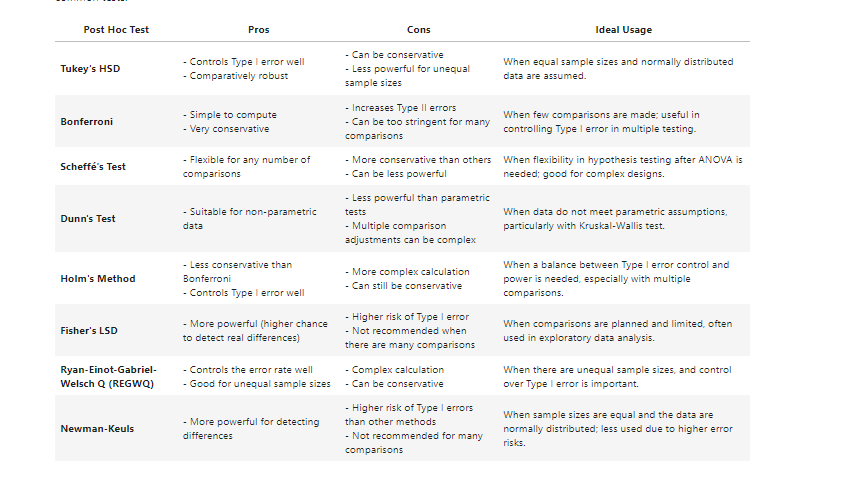